## Afam Okigbo Personal Notebook

## Fast Food  
Fast food establishments are not inherently a bad thing; however, when all a person has access to to eat is a fast food restaurant, it can turn into a problem of unhealthy eating. This is why grocery stores in communities are so vital, because they allow for more options in food choices. We counted fast food establishments as negative towards the score a neighborhood got. The more fast food restaurants a neighborhood had, and the less grocery stores it had, the lower it scored.


*Most - Troy Hill*

In [4]:
#top 5 Fast Food Stores
import geopandas as gpd
csv = gpd.read_file('13 neighborhoods.csv')
csv.sort_values(by=['Number Fast Food'], ascending=False).head(5)

,ZIP Code,Neighborhood,Population,Number Fast Food,Fast Food Per Capita,Number Grocery Stores,Fast Food/Grocery Ratio,Grocery Store Per Capita,geometry
9,15222,Troy Hill,05458,46,0.0084279956027849,4,46:4,0.000732869182850861,None
5,15213,North Oakland,10691,38,0.00355439154428959,3,38:3,0.000280609858759704,None
8,15219,Central Business District,05477,27,0.00492970604345445,1,27:1,0.000182581705313128,None
7,15217,Squirrel Hill South,15317,20,0.00130573872168179,4,20:4,0.000261147744336358,None
1,15203,South Side Slopes,04327,19,0.00439103304830136,2,19:2,0.000462214005084354,None


*Least - Bloomfield*

In [5]:
#top 5 Fast Food Stores
import geopandas as gpd
csv = gpd.read_file('13 neighborhoods.csv')
csv.sort_values(by=['Number Fast Food'], ascending=True).head(5)

,ZIP Code,Neighborhood,Population,Number Fast Food,Fast Food Per Capita,Number Grocery Stores,Fast Food/Grocery Ratio,Grocery Store Per Capita,geometry
12,15233,Manchester,02130,04,0.00187793427230047,0,4:0,0,None
0,15201,Central Lawrenceville,04720,05,0.00105932203389831,1,5:1,0.000211864406779661,None
10,15224,Bloomfield,08665,06,0.000692440854010387,3,6:3,0.000346220427005193,None
4,15212,Perry South,03765,09,0.00239043824701195,3,9:3,0.000796812749003984,None
2,15206,East Liberty,05869,11,0.00711974110032363,4,11:4,0.00258899676375405,None


## Finding Fast Food Score

North Oakland: 0.394833660711502
East Liberty: 0.7908845738942833
Manchester: 0.2086071987480439
Central Business District: 0.5476081796603985
South Side Slopes: 0.4877705877821428
Bloomfield: 0.07691863819965383
Banksville: 0.296078668928196
Central Lawrenceville: 0.11767302259887062
Troy Hill: 0.9362098448760228
St. Clair: 0.30593807377733234
Shadyside: 0.08702748580009143
Squirrel Hill South: 0.14504580966681885
Perry South: 0.26553784860557744


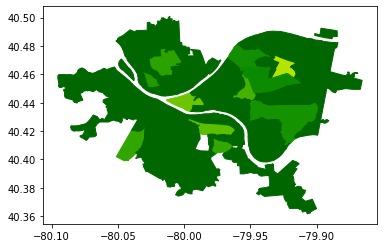

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

try:
    from colour import Color
except:
    print("make sure to do pip install colour. you also need to restart your kernel after you install the pacakge")
    quit()

#create list of 1000 colors that gradient from green to yellow, the more yellow, the higher the score
green_yellow = list((Color("green").range_to(Color("yellow"),1000)))
colors = green_yellow

#importing data
neighborhoodPitt = gpd.read_file('pittsburghpaneighborhoods-.geojson')["geometry"]
neighborhoodnamePitt = gpd.read_file('pittsburghpaneighborhoods-.geojson')["hood"]
csv = gpd.read_file('bigideas_finalprojdata.csv')


data_list = ["Banksville", "Bloomfield", "Central Business District", "Central Lawrenceville", "East Liberty", "Manchester", "North Oakland", "Perry South", "Shadyside", "South Side Slopes", "Squirrel Hill South", "St. Clair", "Troy Hill"]

#find min and max values for score normalization
maxFFCaptia = 0
minFFCaptia = 10000
for i in range(len(csv["Fast Food Per Capita"])):
    if eval(csv["Fast Food Per Capita"][i]) < minFFCaptia:
        minFFCaptia = eval(csv["Fast Food Per Capita"][i])
    if eval(csv["Fast Food Per Capita"][i]) > maxFFCaptia:
        maxFFCaptia = eval(csv["Fast Food Per Capita"][i])


for i in range(len(neighborhoodPitt)):
    try:
        if (neighborhoodnamePitt[i]in data_list) == True:
            shape = neighborhoodPitt[i]
            hoodData = csv.loc[csv['Neighborhood'] == neighborhoodnamePitt[i]]
            weight = float(hoodData["Fast Food Per Capita"]) / maxFFCaptia #find the fast food locations per captia and divides it by the max fast food per captia number to get a normalized score
            print(str(neighborhoodnamePitt[i]) + ": " + (str(weight)))
            fill_color = str(colors[int(weight * 1000) - 1]).upper() #chooses color of neighborhood based on normalized score
            
            #plots nieghborhood
            x,y = shape.exterior.xy
            plt.plot(x, y, linestyle="None")
            plt.fill(x, y, color=fill_color)
        else:
            #plots neighborhood in gray is no data is available
            shape = neighborhoodPitt[i]
            x,y = shape.exterior.xy
            plt.plot(x, y, linestyle="None")
            plt.fill(x, y, color="#006600")

    except:
        for x in range(len(neighborhoodPitt[i])):
            #plots neighborhood in gray is no data is available
            shape = neighborhoodPitt[i][x]
            fill_color = str(colors[int(weight * 1000) - 1]).upper()
            x,y = shape.exterior.xy
            plt.plot(x, y, linestyle="None")
            plt.fill(x, y, color="#006600")

plt.show()

To find the amount of fast food locations in a neighborhood, we corresponded the zipcode to a neighborhood, and make a dictionary. This code iterates through the data, and creates that dictionary and prints out the zip code with the most fast food establishments.

In [7]:
import csv
with open('fastfood.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    ocurrences = {}
    for row in reader:
        if row['ZIP Code'] in ocurrences.keys():
            ocurrences[row['ZIP Code']] = ocurrences[row['ZIP Code']] + 1
        else:
            ocurrences[row['ZIP Code']] = 1
    max_val = max(ocurrences.values())
    max_key = max(ocurrences, key=ocurrences.get)
    #for key in ocurrences.keys(): 
        #print("Zip code:", key, "Number of ocurrences:", ocurrences[key])
    """The section hashtaged out would print out the amount of fast food establishments per zipcode in the list"""
    
    print("Max zip code:", max_key, "value:", max_val)

Max zip code: 15146 value: 51


# Finding Total Score

East Liberty: 0.10455771305285833
St. Clair: 0.04044608579535949
Bloomfield: 0.028404500865550852
Perry South: 0.021115537848605398
Central Lawrenceville: -0.01792019774011335


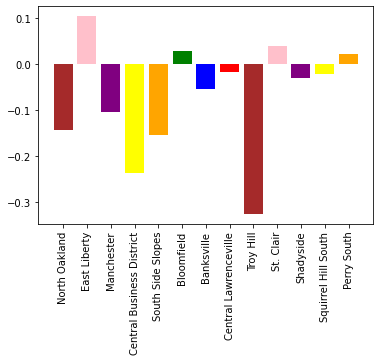

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt


#importing data
neighborhoodPitt = gpd.read_file('pittsburghpaneighborhoods-.geojson')["geometry"]
neighborhoodnamePitt = gpd.read_file('pittsburghpaneighborhoods-.geojson')["hood"]
csv = gpd.read_file('bigideas_finalprojdata.csv')


data_list = ["Banksville", "Bloomfield", "Central Business District", "Central Lawrenceville", "East Liberty", "Manchester", "North Oakland", "Perry South", "Shadyside", "South Side Slopes", "Squirrel Hill South", "St. Clair", "Troy Hill"]

dict = {} #create a dictionary for keeping track of scores

#find min and max values for score normalization
maxFFCaptia = 0
minFFCaptia = 10000
fail = 0
maxFFGroc = 0
minFFGroc = 10000

for i in range(len(csv["Grocery Store Per Capita"])):
    if float(csv["Grocery Store Per Capita"][i]) < minFFGroc:
        minFFGroc = eval(csv["Grocery Store Per Capita"][i])
    if float(csv["Grocery Store Per Capita"][i]) > maxFFGroc:
        maxFFGroc = eval(csv["Grocery Store Per Capita"][i])

for i in range(len(csv["Fast Food Per Capita"])):
    if eval(csv["Fast Food Per Capita"][i]) < minFFCaptia:
        minFFCaptia = eval(csv["Fast Food Per Capita"][i])
    if eval(csv["Fast Food Per Capita"][i]) > maxFFCaptia:
        maxFFCaptia = eval(csv["Fast Food Per Capita"][i])


for i in range(len(neighborhoodPitt)):
    try:
        if (neighborhoodnamePitt[i]in data_list) == True:
            hoodData = csv.loc[csv['Neighborhood'] == neighborhoodnamePitt[i]]
            weight = float(hoodData["Fast Food Per Capita"]) / maxFFCaptia #find the fast food locations per captia and divides it by the max fast food per captia number to get a normalized score
            
            #subtracts fast food score from total score
            try:
                dict[neighborhoodnamePitt[i]] = -(weight/2) 
            except:
                dict[neighborhoodnamePitt[i]] -= (weight/2)
        else:
            fail += 1
    except:
        for x in range(len(neighborhoodPitt[i])):
            fail += 1

for i in range(len(neighborhoodPitt)):
    try:
        if (neighborhoodnamePitt[i]in data_list) == True:
            hoodData = csv.loc[csv['Neighborhood'] == neighborhoodnamePitt[i]]
            weight = float(hoodData["Grocery Store Per Capita"]) / maxFFGroc #find the grocery store locations per captia and divides it by the max fast food per captia number to get a normalized score
            dict[neighborhoodnamePitt[i]] += (weight/2) #adds grocery store score to total score
        else:
            fail += 1
    except:
        for x in range(len(neighborhoodPitt[i])):
            fail += 1
            
sorted_dict = sorted(dict, key=dict.get)

#prints top scores
for i in range(5):
    name = sorted_dict[len(sorted_dict) - 1 - i]
    print(name + ": " +str(dict[name]))
    

names = list(dict.keys())
values = list(dict.values())

import random


colorList = (['red', "orange" , "yellow", "green", "blue", "purple", "pink", "brown"])
random.shuffle(colorList)
plt.bar(range(len(dict)), values, tick_label=names, color = colorList)
plt.xticks(range(len(names)), names, rotation=90)
plt.show()